<a href="https://colab.research.google.com/github/isra-bWk4/upsrj-keras-workspace/blob/main/CNN_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red convulocional para dección de perros**

## Objetivo

Implementar una red convulocional que nos permita procesar imagenes para detectar a qué clase pertenecen, específicamente, necesitamos aprender a diferenciar entre perros y gatos.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from dataclasses import dataclass

1. **Cargar y preparar los datos**

Usaremos el dataset de ejemplo de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), el cual incluye 62,000 imágenes a color de 32x32 en 10 clases, con 600 imágenes por clase.

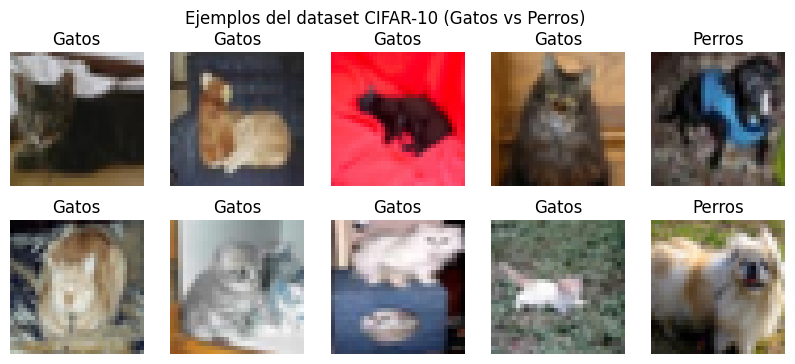

In [100]:
# cargamos base de datos de imagenes y dividimos en train data & test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# estructura de datos
@dataclass
class gatos:
  id: int = 3
  label: str = "Gatos"

@dataclass
class perros:
  id: int = 5
  label: str = "Perros"

deseado = perros
no_deseado = gatos

# clases: 3 = gato, 5 = perro
mask_train = (y_train.flatten() == gatos.id) | (y_train.flatten() == perros.id)
mask_test = (y_test.flatten() == gatos.id) | (y_test.flatten() == perros.id)

# filtramos de la base de datos las clases deseadas
x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test = x_test[mask_test], y_test[mask_test]

# normalización (0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# convertimos etiquetas: gato = 0, perro = 1
y_train = (y_train == deseado.id).astype(int)
y_test = (y_test == deseado.id).astype(int)

# visualización de imágenes
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i])
  ax.set_title(deseado.label if y_train[i] == 1 else no_deseado.label)
  ax.axis("off")
plt.suptitle(f"Ejemplos del dataset CIFAR-10 ({no_deseado.label} vs {deseado.label})")
plt.show()

2. **Ejecución con DNN (poco eficiente)**

En este caso específico no es eficiente utilizar una DNN para el análisis de nuestros datos, esto debido a que el formato de los datos es de imágenes de 32x32 RGB, lo cual se traduce a 3072 neuronas por imágen, lo cual dado el número de entradas(50,000) nos da en total 153,600,000 neuronas necesarias.

In [101]:
model_dnn = Sequential()

#Input Layer
model_dnn.add(Flatten(input_shape=(32,32,3)))
#Hidden Layers
model_dnn.add(Dense(128, activation="relu"))
#Output Layer
model_dnn.add(Dense(1, activation="sigmoid"))

#Compilamos DNN
model_dnn.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

#alimentamos DNN
history_dnn = model_dnn.fit(x_train, y_train, epochs=5, batch_size=64,
                            validation_data=(x_test, y_test), verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5327 - loss: 0.8074 - val_accuracy: 0.5790 - val_loss: 0.6683
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5812 - loss: 0.6688 - val_accuracy: 0.5840 - val_loss: 0.6761
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5942 - loss: 0.6673 - val_accuracy: 0.5925 - val_loss: 0.6621
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5935 - loss: 0.6631 - val_accuracy: 0.5980 - val_loss: 0.6608
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5913 - loss: 0.6617 - val_accuracy: 0.5515 - val_loss: 0.6837


3. **Ejecución con CNN**

Dado el formato de los datos de entrada mencionados anteriormente, haremos una red neuronal convulocional(CNN) para el análisis.

In [102]:
from IPython.core import history
#model
model_cnn = Sequential()

#inputs
model_cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
# Hidden leayer
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64, (3,3), activation="relu"))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation="relu"))
model_cnn.add(Dropout(0.5))
# output layer
model_cnn.add(Dense(1, activation="sigmoid"))

##Compilamos
model_cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

##alimentamos
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, batch_size=64,
                            validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5613 - loss: 0.6814 - val_accuracy: 0.6635 - val_loss: 0.6180
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6689 - loss: 0.6127 - val_accuracy: 0.6940 - val_loss: 0.5649
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7147 - loss: 0.5585 - val_accuracy: 0.7185 - val_loss: 0.5363
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7285 - loss: 0.5368 - val_accuracy: 0.7215 - val_loss: 0.5339
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7406 - loss: 0.5172 - val_accuracy: 0.7355 - val_loss: 0.5086


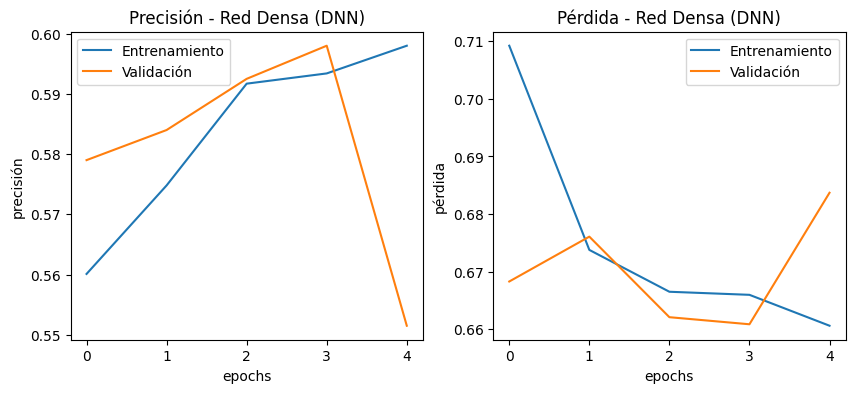

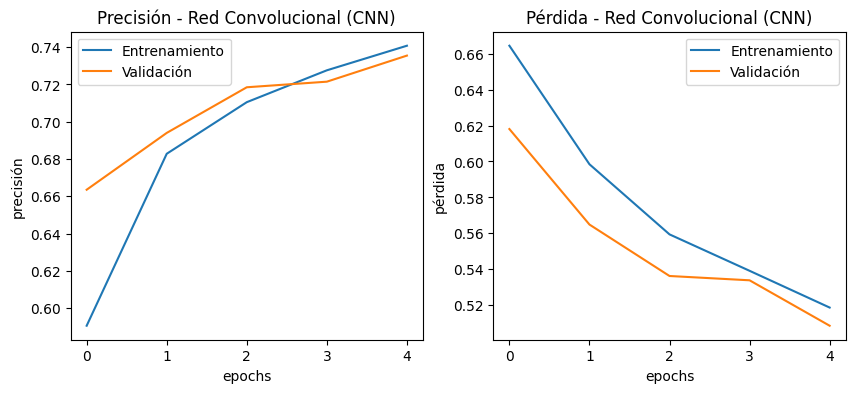

In [103]:
# graficación de precisión y pérdida de entrenamiento
def plot_history(history, title):
  plt.figure(figsize=(10,4))
  # precisión
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Entrenamiento')
  plt.plot(history.history['val_accuracy'], label='Validación')
  plt.title(f'Precisión - {title}')
  plt.xlabel('epochs')
  plt.ylabel('precisión')
  plt.legend()
  # pérdida
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label='Entrenamiento')
  plt.plot(history.history['val_loss'], label='Validación')
  plt.title(f'Pérdida - {title}')
  plt.xlabel('epochs')
  plt.ylabel('pérdida')
  plt.legend()
  # despliegue de gráfico
  plt.show()

plot_history(history_dnn, 'Red Densa (DNN)')
plot_history(history_cnn, 'Red Convolucional (CNN)')

In [104]:
# Evaluar resultados
print('\nEvaluacion DNN:')
model_dnn.evaluate(x_test, y_test)

print('\nEvaluacion CNN:')
model_cnn.evaluate(x_test, y_test)


Evaluacion DNN:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5290 - loss: 0.6969

Evaluacion CNN:
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7260 - loss: 0.5149


[0.5086323618888855, 0.7354999780654907]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


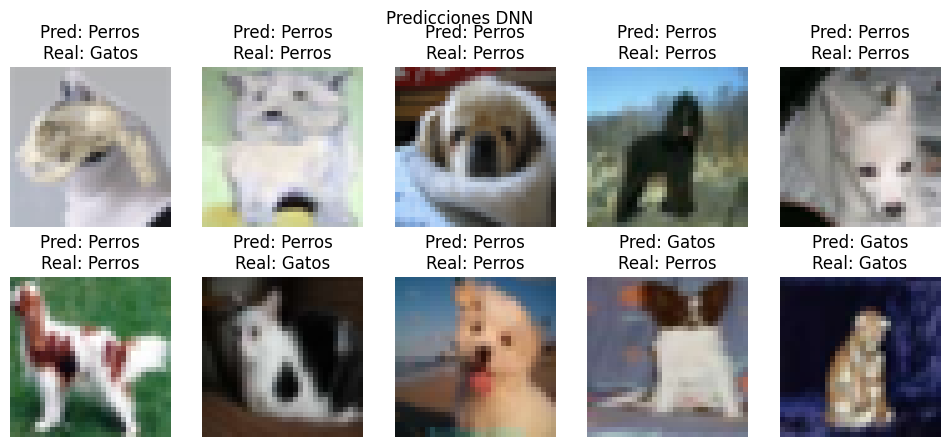

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


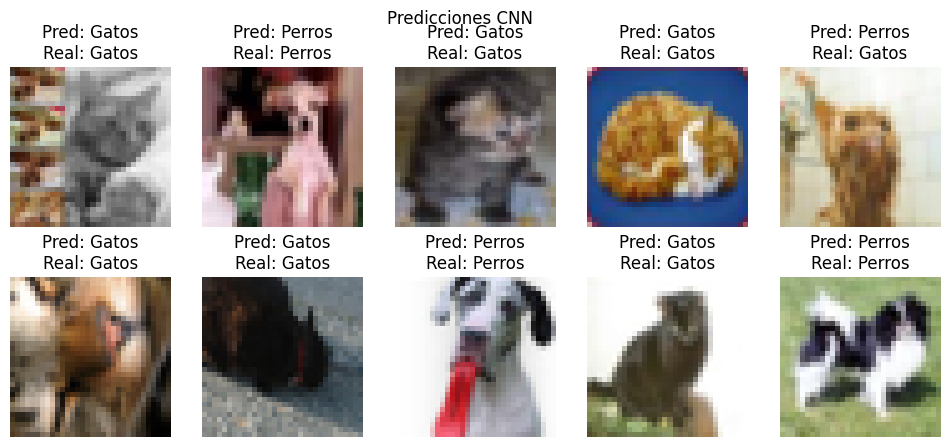

In [105]:
from IPython.core.pylabtools import figsize
# visualización de algunas predicciones
def show_predictions(model, x_data, y_data, n=10, title="Predicciones"):
  idx = np.random.choice(len(x_data), n)
  preds = (model.predict(x_data[idx]) > 0.5).astype(int)
  fig, axes = plt.subplots(2, n//2, figsize=(12,5))
  for i, ax in enumerate(axes.flat):
    ax.imshow(x_data[idx[i]])
    ax.set_title(f"Pred: {deseado.label if preds[i] == 1 else no_deseado.label}\nReal: {deseado.label if y_data[idx[i]] == 1 else no_deseado.label}")
    ax.axis("off")
  plt.suptitle(title)
  plt.show()

show_predictions(model_dnn, x_test, y_test, title="Predicciones DNN")
show_predictions(model_cnn, x_test, y_test, title="Predicciones CNN")

In [118]:
from google.colab import files
from tensorflow.keras.preprocessing import image

#subir imagen desde tu PC
uploaded = files.upload()

#Mostramos el nombre del archivo subido
for fn in uploaded.keys():
  img_path = fn
  print("Archivo cargado:", img_path)

Saving buddy4.jpg to buddy4.jpg
Archivo cargado: buddy4.jpg


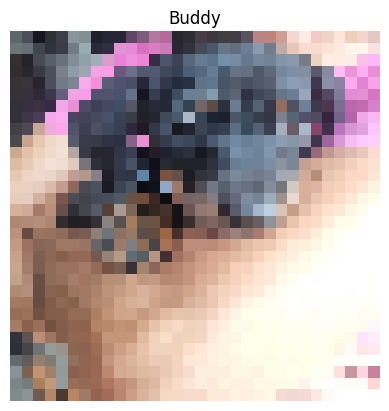

In [119]:
#cargar y preparar imagen
img = image.load_img(img_path, target_size=(32,32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) #forma (1, 32, 32, 3)

plt.imshow(img)
plt.title("Buddy")
plt.axis("off")
plt.show()

In [121]:
# hacer predicción
pred = model_cnn.predict(img_array)[0][0]
label = f"Buddy es un {perros.label if pred > 0.5 else gatos.label}"
print(f"Predccion del modelo: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predccion del modelo: Buddy es un Perros


5. **Mejora del modelo CNN para mayor precision**

Implementamos mas capas a nuestro modelo CNN para asegurar una precision entre el 80% y 90%


In [122]:
from tensorflow.keras import layers, models

improved_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# compilamos CNN
improved_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# alimentamos CNN
improved_history = improved_model.fit(x_train, y_train, epochs=5, batch_size=64,
                                  validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.5903 - loss: 0.8062 - val_accuracy: 0.5020 - val_loss: 0.6878
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6394 - loss: 0.6481 - val_accuracy: 0.5790 - val_loss: 0.6600
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7006 - loss: 0.5753 - val_accuracy: 0.6765 - val_loss: 0.6008
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7283 - loss: 0.5363 - val_accuracy: 0.7185 - val_loss: 0.5356
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7484 - loss: 0.5027 - val_accuracy: 0.7500 - val_loss: 0.4962


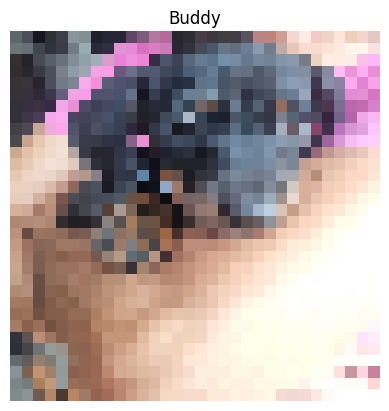

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicción del modelo: Buddy es un Gatos


In [125]:
# cargar y preparar la imagen
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) # forma (1, 32, 32, 3)

plt.imshow(img)
plt.title("Buddy")
plt.axis("off")
plt.show()

# hacer predicción
pred = improved_model.predict(img_array)[0][0]
label = f"Buddy es un {perros.label if pred > 0.5 else gatos.label}"
print(f"Predicción del modelo: {label}")

In [124]:
# hacer predicción
pred = model_cnn.predict(img_array)[0][0]
label = f"Buddy es un {perros.label if pred > 0.5 else gatos.label}"
print(f"Predccion del modelo: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predccion del modelo: Buddy es un Perros
